In [412]:
# Import necessary libraries and dependencies
import pandas as pd
from pathlib import Path
import numpy as np
import seaborn as sns
import hvplot.pandas
import panel as pn
import holoviews as hv

%matplotlib inline

In [426]:
# Use yahoo finance data to test the code
import yfinance as yf

symbol = 'MSFT, AAPL, ^GSPC'
start_date = '2018-04-01'
end_date = '2023-03-31'
ticker_data = yf.download(symbol, start=start_date, end=end_date)
ticker_data.head()

[*********************100%***********************]  3 of 3 completed


Adj Close               Close                High                \
                AAPL  MSFT   ^GSPC  AAPL  MSFT   ^GSPC  AAPL  MSFT   ^GSPC   
Date                                                                         
2018-04-02     39.72 83.54 2581.88 41.67 88.52 2581.88 42.24 90.88 2638.30   
2018-04-03     40.13 84.67 2614.45 42.10 89.71 2614.45 42.19 90.05 2619.14   
2018-04-04     40.90 87.14 2644.69 42.90 92.33 2644.69 43.00 92.76 2649.86   
2018-04-05     41.18 87.19 2662.84 43.20 92.38 2662.84 43.56 93.07 2672.08   
2018-04-06     40.13 85.16 2604.47 42.10 90.23 2604.47 43.12 92.46 2656.88   

             Low                Open                   Volume            \
            AAPL  MSFT   ^GSPC  AAPL  MSFT   ^GSPC       AAPL      MSFT   
Date                                                                      
2018-04-02 41.12 87.51 2553.80 41.66 90.47 2633.45  150347200  48515400   
2018-04-03 41.22 87.89 2575.49 41.91 89.58 2592.17  121112000  37213800   
2018-04-04 41.19 87.73 2573.61 41.22 87.85 2584.04  138422000  35560000   
2018-04-05 43.02 91.40 2649.58 43.15 92.44 2657.36  107732800  29771900   
2018-04-06 42.05 89.48 2586.27 42.74 91.49 2645.82  140021200  38026000   

                        
                 ^GSPC  
Date                    
2018-04-02  3635780000  
2018-04-03  3395840000  
2018-04-04  3369230000  
2018-04-05  3230430000  
2018-04-06  3312390000

In [427]:
ticker_data = ticker_data.drop(columns = ["Open","High","Low","Adj Close","Volume"])

ticker_data = ticker_data.reset_index()

ticker_data = ticker_data.droplevel(0, axis=1)

ticker_data.head()

,,AAPL,MSFT,^GSPC
0,2018-04-02,41.67,88.52,2581.88
1,2018-04-03,42.10,89.71,2614.45
2,2018-04-04,42.90,92.33,2644.69
3,2018-04-05,43.20,92.38,2662.84
4,2018-04-06,42.10,90.23,2604.47


In [428]:
ticker_data = ticker_data.rename(columns={"":"Date", "^GSPC":"SP500"})

ticker_data.head()

,Date,AAPL,MSFT,SP500
0,2018-04-02,41.67,88.52,2581.88
1,2018-04-03,42.10,89.71,2614.45
2,2018-04-04,42.90,92.33,2644.69
3,2018-04-05,43.20,92.38,2662.84
4,2018-04-06,42.10,90.23,2604.47


In [432]:
# Calculate the daily return using the 'pct_change()' function

daily_returns = ticker_data[["AAPL","MSFT","SP500"]].pct_change()

daily_returns.head()

# print(daily_returns.columns)

,AAPL,MSFT,SP500
0,NaN,NaN,NaN
1,0.01,0.01,0.01
2,0.02,0.03,0.01
3,0.01,0.00,0.01
4,-0.03,-0.02,-0.02


<AxesSubplot:title={'center':'Cumulative Returns of Symbols over the Last 5 Year'}>

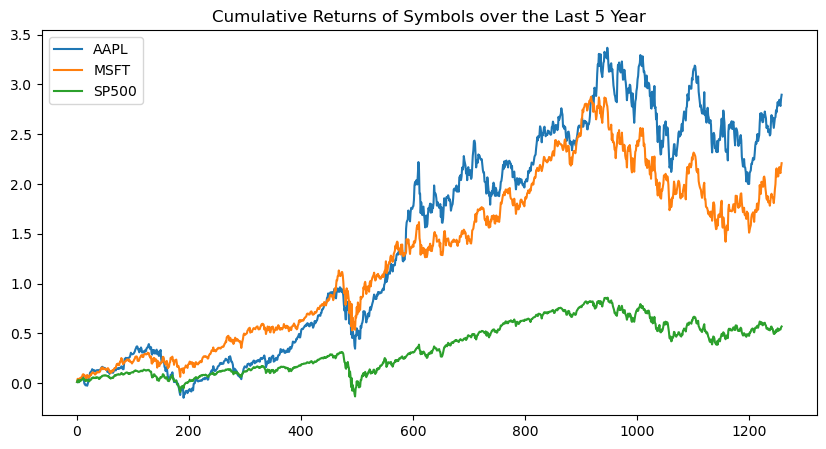

In [433]:
# Calculate the cumulative returns using the 'cumprod()' function
cumulative_returns = (1 + daily_returns).cumprod() - 1

cumulative_returns.plot(figsize=(10,5), title="Cumulative Returns of Symbols over the Last 5 Year")

In [434]:
# Calculate covariance of all daily returns of Symbols vs. SP500
covariance_aapl= daily_returns['AAPL'].cov(daily_returns['SP500'])
covariance_msft= daily_returns['MSFT'].cov(daily_returns['SP500'])

# Calculate variance of the S&P 500
variance = daily_returns['SP500'].var()

# Calculate beta of all daily returns of MSFT
beta_aapl = round(covariance_aapl / variance, 2)
beta_msft = round(covariance_msft / variance, 2)

print(f"AAPL's Beta is: {beta_aapl}")
print(f"MSFT's Beta is: {beta_msft}")

AAPL's Beta is: 1.23
MSFT's Beta is: 1.21


In [435]:
# Calculate Sharpe Ratio
sharpe_ratios_aapl = round((daily_returns['AAPL'].mean()) / (daily_returns['AAPL'].std() * np.sqrt(252)),4)
sharpe_ratios_msft = round((daily_returns['MSFT'].mean()) / (daily_returns['MSFT'].std() * np.sqrt(252)),4)
sharpe_ratios_sp500 = round((daily_returns['SP500'].mean()) / (daily_returns['SP500'].std() * np.sqrt(252)),4)
print(f"AAPL's Sharpe Ratio is : {sharpe_ratios_aapl}")
print(f"MSFT's Sharpe Ratio is : {sharpe_ratios_msft}")
print(f"SP500's Sharpe Ratio is : {sharpe_ratios_sp500}")

AAPL's Sharpe Ratio is : 0.0039
MSFT's Sharpe Ratio is : 0.0036
SP500's Sharpe Ratio is : 0.0021


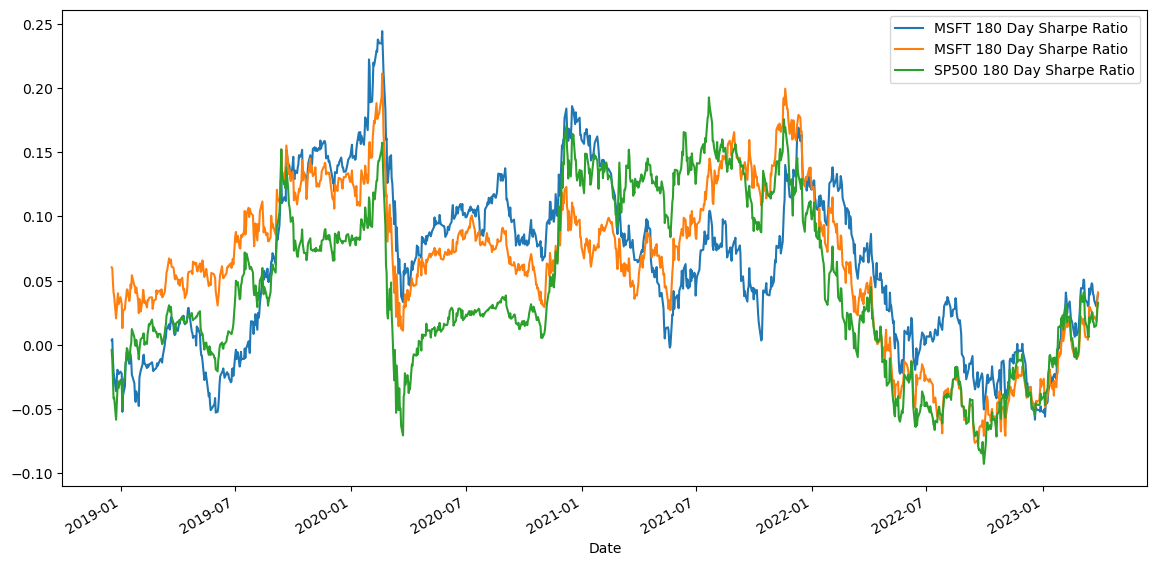

In [333]:
# Plot a rolling 180-day Sharpe Ratio of MSFT and SP500 closing prices
rolling_SPR_aapl = daily_returns['AAPL'].rolling(window=180).mean() / daily_returns['AAPL'].rolling(window=180).std()
rolling_SPR_msft = daily_returns['MSFT'].rolling(window=180).mean() / daily_returns['MSFT'].rolling(window=180).std()
rolling_SPR_sp500 = daily_returns['SP500'].rolling(window=180).mean() / daily_returns['SP500'].rolling(window=180).std()
ax = rolling_SPR_aapl.plot(figsize=(14,7))
rolling_SPR_msft.plot(ax=ax)
rolling_SPR_SP500.plot(ax=ax)

# Set the legend of the figure
ax.legend(["MSFT 180 Day Sharpe Ratio", "MSFT 180 Day Sharpe Ratio", "SP500 180 Day Sharpe Ratio"])

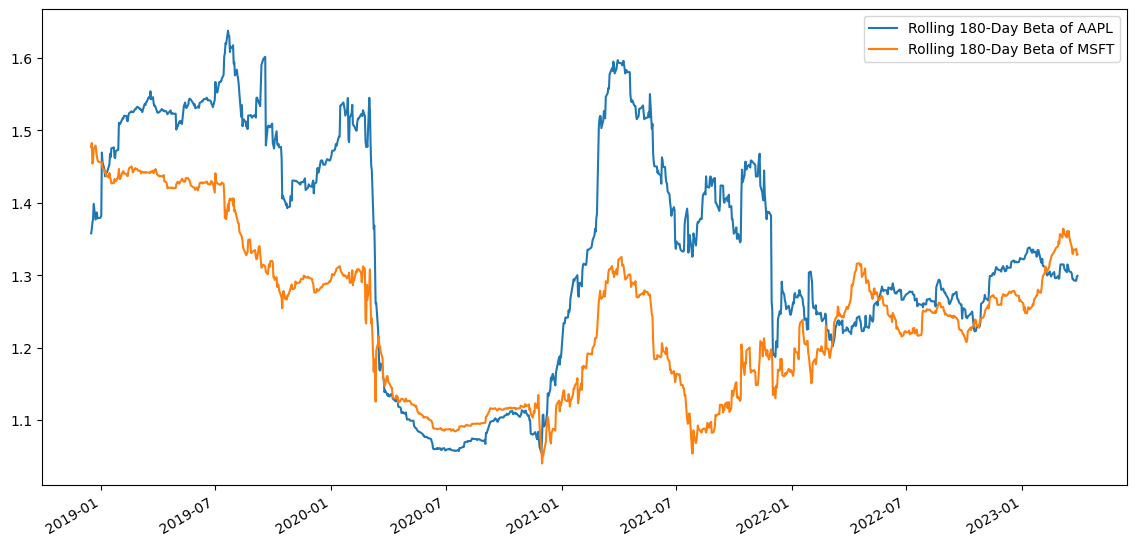

In [335]:
# Calculate 180-day rolling beta of MSFT and plot the data
rolling_covariance_aapl = daily_returns['AAPL'].rolling(window=180).cov(daily_returns['SP500'])
rolling_covariance_msft = daily_returns['MSFT'].rolling(window=180).cov(daily_returns['SP500'])
rolling_variance = daily_returns['SP500'].rolling(window=180).var()
rolling_beta_aapl= rolling_covariance_aapl / rolling_variance
rolling_beta_msft= rolling_covariance_msft / rolling_variance
ax = rolling_beta_aapl.plot(figsize=(14,7))
rolling_beta_msft.plot(ax=ax)

ax.legend(['Rolling 180-Day Beta of AAPL','Rolling 180-Day Beta of MSFT'])

In [410]:
# Configuring a Monte Carlo simulation to forecast five years cumulative returns
import yfinance as yf
from MCForecastTools import MCSimulation

symbol = 'MSFT'
start_date = '2018-04-01'
end_date = '2023-03-31'
ticker_data = yf.download(symbol, start=start_date, end=end_date)
ticker_data = pd.concat([ticker_data], axis=1, keys=["MSFT"])
ticker_data = ticker_data.rename(columns={"Close":"close"})
ticker_data

[*********************100%***********************]  1 of 1 completed


MSFT                                         
             Open   High    Low  close Adj Close    Volume
Date                                                      
2018-04-02  90.47  90.88  87.51  88.52     83.54  48515400
2018-04-03  89.58  90.05  87.89  89.71     84.67  37213800
2018-04-04  87.85  92.76  87.73  92.33     87.14  35560000
2018-04-05  92.44  93.07  91.40  92.38     87.19  29771900
2018-04-06  91.49  92.46  89.48  90.23     85.16  38026000
...           ...    ...    ...    ...       ...       ...
2023-03-24 277.24 280.63 275.28 280.57    280.57  28172000
2023-03-27 280.50 281.46 275.52 276.38    276.38  26840200
2023-03-28 275.79 276.14 272.05 275.23    275.23  21878600
2023-03-29 278.96 281.14 278.41 280.51    280.51  25087000
2023-03-30 284.23 284.46 281.48 284.05    284.05  25053400

[1259 rows x 6 columns]

In [346]:
# Configuring a Monte Carlo simulation to forecast three years cumulative returns

from MCForecastTools import MCSimulation

num_sims = 500

MC_ticker = MCSimulation(
    portfolio_data = ticker_data,
    num_simulation = num_sims,
    num_trading_days = 252*3
)
# Printing the simulation input data
MC_ticker.portfolio_data.head()

MSFT                                                   
            Open  High   Low close Adj Close    Volume daily_return
Date                                                               
2018-04-02 90.47 90.88 87.51 88.52     83.54  48515400          NaN
2018-04-03 89.58 90.05 87.89 89.71     84.67  37213800         0.01
2018-04-04 87.85 92.76 87.73 92.33     87.14  35560000         0.03
2018-04-05 92.44 93.07 91.40 92.38     87.19  29771900         0.00
2018-04-06 91.49 92.46 89.48 90.23     85.16  38026000        -0.02

In [347]:
# Running a Monte Carlo simulation to forecast five years cumulative returns
MC_ticker.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.


/Users/vickygao/Desktop/project1/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Monte Carlo simulation number 340.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
1,1.01,1.00,0.99,1.01,1.01,0.98,1.00,1.04,1.00,1.00,...,0.99,0.99,0.99,0.99,1.01,1.00,1.01,1.01,0.98,1.00
2,1.02,1.00,0.96,0.97,1.02,0.97,1.03,1.03,0.98,1.00,...,1.03,1.01,1.02,1.03,1.00,0.98,1.01,1.02,0.98,0.98
3,1.05,1.02,0.98,1.00,1.05,0.97,1.04,1.01,0.97,1.01,...,1.08,1.03,1.02,1.03,1.00,0.96,1.04,1.04,0.96,0.97
4,1.05,1.05,0.99,1.01,1.04,0.98,1.07,1.00,0.98,0.99,...,1.09,1.03,1.04,1.02,1.01,0.99,1.03,1.01,0.99,0.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,4.31,1.45,0.62,1.54,1.80,3.14,3.90,2.28,2.65,2.74,...,1.77,2.07,2.33,2.92,6.61,1.38,1.61,0.77,1.72,5.53
753,4.34,1.47,0.60,1.54,1.82,3.23,3.93,2.29,2.63,2.80,...,1.76,2.11,2.38,2.85,6.79,1.39,1.62,0.78,1.74,5.37
754,4.35,1.46,0.61,1.53,1.91,3.22,3.81,2.27,2.61,2.84,...,1.75,2.12,2.43,2.86,6.54,1.42,1.68,0.75,1.76,5.46
755,4.34,1.46,0.61,1.53,1.87,3.22,3.90,2.23,2.65,2.75,...,1.74,2.18,2.40,2.95,6.74,1.42,1.68,0.76,1.75,5.41


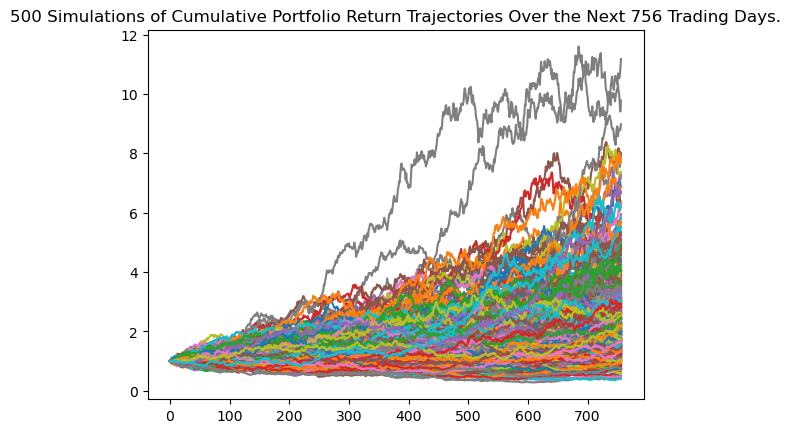

In [348]:
# Plot simulation outcomes
line_plot = MC_ticker.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_ticker_sim_plot.png", bbox_inches="tight")

In [349]:
# Compute summary statistics from the simulated daily returns
simulated_returns_data = {
    "mean": list(MC_ticker.simulated_return.mean(axis=1)),
    "median": list(MC_ticker.simulated_return.median(axis=1)),
    "min": list(MC_ticker.simulated_return.min(axis=1)),
    "max": list(MC_ticker.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns = pd.DataFrame(simulated_returns_data)

# Display sample data
df_simulated_returns.head()

,mean,median,min,max
0,1.00,1.00,1.00,1.00
1,1.00,1.00,0.94,1.05
2,1.00,1.00,0.93,1.08
3,1.00,1.00,0.91,1.09
4,1.00,1.00,0.90,1.14


<AxesSubplot:title={'center':'Simulated Cumulative Return Behavior of MSFT Stock Over the Next Three Years'}>

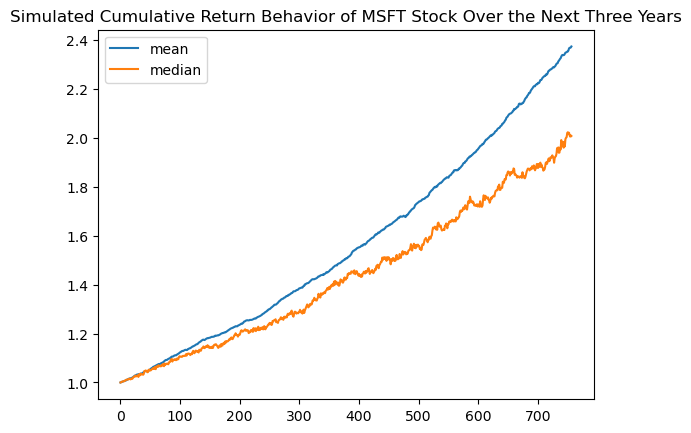

In [350]:
# Use the `plot` function to visually analyze TSLA cumulative returns over the next three hears
# Plot both mean and median forecasted cumulative return
df_simulated_returns[['mean', 'median']].plot(title="Simulated Cumulative Return Behavior of MSFT Stock Over the Next Three Years")

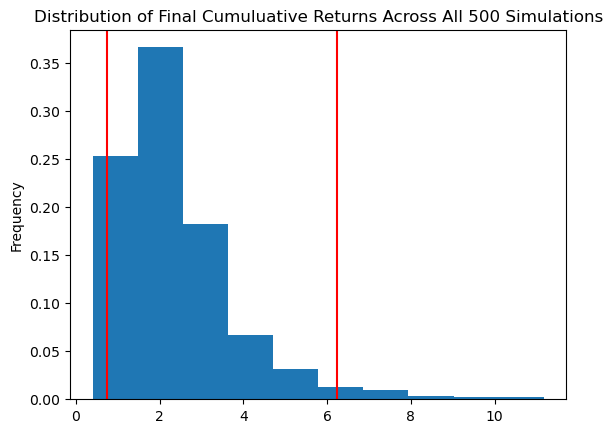

In [351]:
# Plot probability distribution and confidence intervals
dist_plot = MC_ticker.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_ticker_dist_plot.png',bbox_inches='tight')

In [352]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_ticker.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count          500.00
mean             2.37
std              1.42
min              0.41
25%              1.43
50%              2.01
75%              2.92
max             11.17
95% CI Lower     0.74
95% CI Upper     6.23
Name: 756, dtype: float64


In [354]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in Microsoft stocks
ci_lower = round(tbl[8]*10000,2)
ci_upper = round(tbl[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the stock"
      f" over the next 3 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $10,000 in the stock over the next 3 years will end within in the range of $7418.3 and $62308.66


In [528]:
#use historic data to backtest the New Portfolio.
# Use the `dot` function to multiply the weights by each stock's daily return to get the portfolio daily return
symbol = 'AAPL, MSFT, TSLA'
start_date = '2018-04-01'
end_date = '2023-03-31'
ticker_data = yf.download(symbol, start=start_date, end=end_date)
ticker_data.head()

[*********************100%***********************]  3 of 3 completed


Adj Close             Close              High               Low  \
                AAPL  MSFT  TSLA  AAPL  MSFT  TSLA  AAPL  MSFT  TSLA  AAPL   
Date                                                                         
2018-04-02     39.72 83.54 16.83 41.67 88.52 16.83 42.24 90.88 17.36 41.12   
2018-04-03     40.13 84.67 17.84 42.10 89.71 17.84 42.19 90.05 18.22 41.22   
2018-04-04     40.90 87.14 19.13 42.90 92.33 19.13 43.00 92.76 19.22 41.19   
2018-04-05     41.18 87.19 20.38 43.20 92.38 20.38 43.56 93.07 20.42 43.02   
2018-04-06     40.13 85.16 19.95 42.10 90.23 19.95 43.12 92.46 20.62 42.05   

                        Open                 Volume                       
            MSFT  TSLA  AAPL  MSFT  TSLA       AAPL      MSFT       TSLA  
Date                                                                      
2018-04-02 87.51 16.31 41.66 90.47 17.08  150347200  48515400  241710000  
2018-04-03 87.89 16.97 41.91 89.58 17.99  121112000  37213800  282666000  
2018-04-04 87.73 16.80 41.22 87.85 16.85  138422000  35560000  298450500  
2018-04-05 91.40 19.21 43.15 92.44 19.29  107732800  29771900  286816500  
2018-04-06 89.48 19.70 42.74 91.49 20.07  140021200  38026000  202804500

In [529]:
ticker_data = ticker_data.drop(columns = ["Open","High","Low","Adj Close","Volume"])
ticker_data = ticker_data.reset_index()

ticker_data = ticker_data.droplevel(0, axis=1)
ticker_data = ticker_data.rename(columns={"":"Date"})

ticker_data.head()

,Date,AAPL,MSFT,TSLA
0,2018-04-02,41.67,88.52,16.83
1,2018-04-03,42.10,89.71,17.84
2,2018-04-04,42.90,92.33,19.13
3,2018-04-05,43.20,92.38,20.38
4,2018-04-06,42.10,90.23,19.95


In [492]:
ticker_data.columns

Index(['Date', 'AAPL', 'MSFT', 'TSLA'], dtype='object')

In [530]:
# Calculate the daily return using the 'pct_change()' function
daily_returns = ticker_data[["AAPL", "MSFT", "TSLA"]].pct_change()

daily_returns.head()


,AAPL,MSFT,TSLA
0,NaN,NaN,NaN
1,0.01,0.01,0.06
2,0.02,0.03,0.07
3,0.01,0.00,0.07
4,-0.03,-0.02,-0.02


In [539]:
cumulative_returns = (1 + daily_returns).cumprod() - 1
cumulative_returns.head()

,AAPL,MSFT,TSLA
0,NaN,NaN,NaN
1,0.01,0.01,0.06
2,0.03,0.04,0.14
3,0.04,0.04,0.21
4,0.01,0.02,0.19


In [544]:
weights = [0.5, 0.3, 0.2]

portfolio_returns = daily_returns.dot(weights)

portfolio_returns = pd.DataFrame(portfolio_returns, columns=["Portfolio Returns"])

portfolio_returns

,Portfolio Returns
0,NaN
1,0.02
2,0.03
3,0.02
4,-0.02
...,...
1254,0.01
1255,-0.01
1256,-0.01
1257,0.02


In [547]:
##calculate portfolio's cumulative returns and net value.
initial_investment = 10000

cumulative_returns_portfolio = (1 + portfolio_returns).cumprod() - 1 

cumulative_returns_portfolio

,Portfolio Returns
0,NaN
1,0.02
2,0.05
3,0.07
4,0.05
...,...
1254,4.26
1255,4.21
1256,4.18
1257,4.29


In [549]:
combined_cumulative_returns=pd.concat([cumulative_returns, cumulative_returns_portfolio], axis="columns",join="inner")

combined_cumulative_returns

,AAPL,MSFT,TSLA,Portfolio Returns
0,NaN,NaN,NaN,NaN
1,0.01,0.01,0.06,0.02
2,0.03,0.04,0.14,0.05
3,0.04,0.04,0.21,0.07
4,0.01,0.02,0.19,0.05
...,...,...,...,...
1254,2.85,2.17,10.31,4.26
1255,2.80,2.12,10.40,4.21
1256,2.78,2.11,10.24,4.18
1257,2.86,2.17,10.52,4.29


In [550]:
def formatter(x):
    return f'{x:.0f}'

combined_cumulative_returns.hvplot.line(
    xlabel='Date',
    ylabel='Net Value',
    yformatter=formatter,
    title='Portfolio and Tickers Cumulative Returns Over Last 5 Years',
    width=700,
    height=400
)

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [551]:
symbol = '^GSPC'
start_date = '2018-04-01'
end_date = '2023-03-31'
index_data = yf.download(symbol, start=start_date, end=end_date)
index_data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-04-02,2633.45,2638.30,2553.80,2581.88,2581.88,3635780000
2018-04-03,2592.17,2619.14,2575.49,2614.45,2614.45,3395840000
2018-04-04,2584.04,2649.86,2573.61,2644.69,2644.69,3369230000
2018-04-05,2657.36,2672.08,2649.58,2662.84,2662.84,3230430000
2018-04-06,2645.82,2656.88,2586.27,2604.47,2604.47,3312390000


In [552]:
index_data = index_data.drop(columns = ["Open","High","Low","Adj Close","Volume"])
index_data = index_data.reset_index()
index_data = index_data.rename(columns={"Close":"SP500"})
index_data.head()

,Date,SP500
0,2018-04-02,2581.88
1,2018-04-03,2614.45
2,2018-04-04,2644.69
3,2018-04-05,2662.84
4,2018-04-06,2604.47


In [553]:
index_data.columns

Index(['Date', 'SP500'], dtype='object')

In [558]:
daily_returns_sp500 = index_data["SP500"].pct_change()
daily_returns_sp500 = pd.DataFrame(daily_returns_sp500, columns=["SP500"])
daily_returns_sp500

,SP500
0,NaN
1,0.01
2,0.01
3,0.01
4,-0.02
...,...
1254,0.01
1255,0.00
1256,-0.00
1257,0.01


In [561]:
#calculate new portfolio's sharpe ratio.
sharpe_ratios_portfolio = round((portfolio_returns['Portfolio Returns'].mean()) / (portfolio_returns['Portfolio Returns'].std() * np.sqrt(252)),4)
sharpe_ratios_sp500 = round((daily_returns_sp500['SP500'].mean()) / (daily_returns_sp500['SP500'].std() * np.sqrt(252)),4)
print(f"Portfolio's Sharpe Ratio is : {sharpe_ratios_portfolio}")
print(f"SP500's Sharpe Ratio is : {sharpe_ratios_sp500}")

Portfolio's Sharpe Ratio is : 0.0047
SP500's Sharpe Ratio is : 0.0021


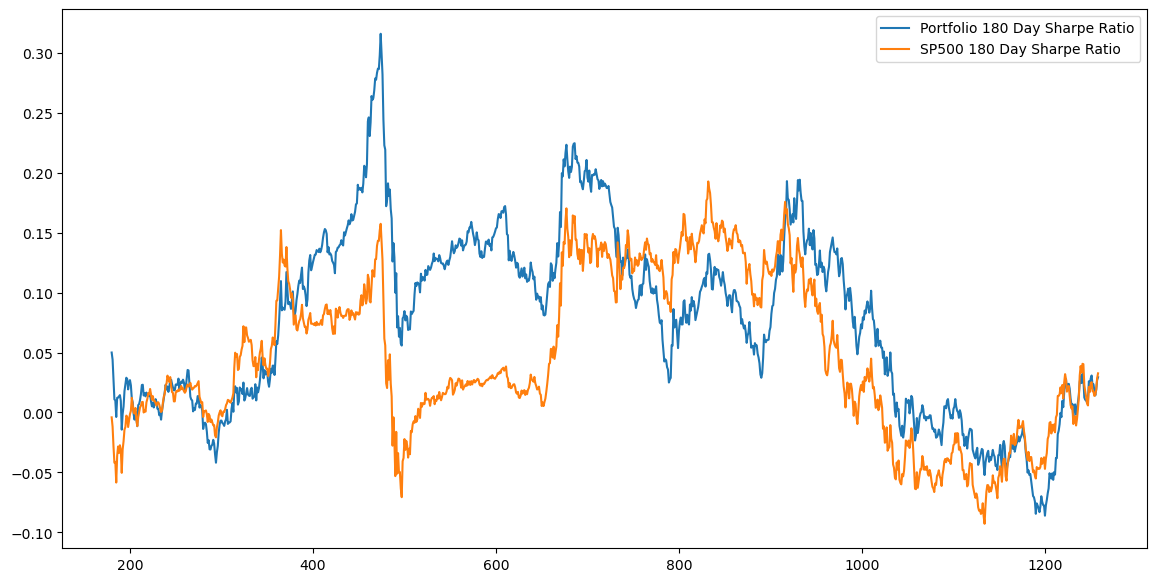

In [562]:
# Plot a rolling 180-day Sharpe Ratio of Portfolio and SP500.

rolling_SPR_portfolio = portfolio_returns['Portfolio Returns'].rolling(window=180).mean() / portfolio_returns['Portfolio Returns'].rolling(window=180).std()
rolling_SPR_SP500 = daily_returns_sp500['SP500'].rolling(window=180).mean() / daily_returns_sp500['SP500'].rolling(window=180).std()
ax = rolling_SPR_portfolio.plot(figsize=(14,7))
rolling_SPR_SP500.plot(ax=ax)

# Set the legend of the figure
ax.legend(["Portfolio 180 Day Sharpe Ratio", "SP500 180 Day Sharpe Ratio"])

In [569]:
symbol = 'AAPL, MSFT, TSLA'
start_date = '2018-04-01'
end_date = '2023-03-31'
ticker_data = yf.download(symbol, start=start_date, end=end_date)
ticker_data = ticker_data.drop(columns = ["Open","High","Low","Adj Close","Volume"])
ticker_data = ticker_data.reset_index()

ticker_data = ticker_data.droplevel(0, axis=1)
ticker_data = ticker_data.rename(columns={"":"Date"})

ticker_data.head()


[*********************100%***********************]  3 of 3 completed


,Date,AAPL,MSFT,TSLA
0,2018-04-02,41.67,88.52,16.83
1,2018-04-03,42.10,89.71,17.84
2,2018-04-04,42.90,92.33,19.13
3,2018-04-05,43.20,92.38,20.38
4,2018-04-06,42.10,90.23,19.95


In [574]:

ticker_data.columns = pd.MultiIndex.from_tuples([('','Date'),('AAPL', 'close'), ('MSFT', 'close'), ('TSLA', 'close')])

ticker_data.head()

,,AAPL,MSFT,TSLA
,Date,close,close,close
0,2018-04-02,41.67,88.52,16.83
1,2018-04-03,42.10,89.71,17.84
2,2018-04-04,42.90,92.33,19.13
3,2018-04-05,43.20,92.38,20.38
4,2018-04-06,42.10,90.23,19.95


In [577]:
ticker_data = ticker_data.drop(columns={''})

ticker_data.head()

,AAPL,MSFT,TSLA
,close,close,close
0,41.67,88.52,16.83
1,42.10,89.71,17.84
2,42.90,92.33,19.13
3,43.20,92.38,20.38
4,42.10,90.23,19.95


In [578]:
# Configuring a Monte Carlo simulation to forecast portfolio three years cumulative returns

from MCForecastTools import MCSimulation

MC_portfolio = MCSimulation(
    portfolio_data = ticker_data,
    weights = [0.5, 0.3, 0.2],
    num_simulation = 500,
    num_trading_days = 252*3
)

# Printing the simulation input data
MC_portfolio.portfolio_data.head()

AAPL               MSFT               TSLA             
  close daily_return close daily_return close daily_return
0 41.67          NaN 88.52          NaN 16.83          NaN
1 42.10         0.01 89.71         0.01 17.84         0.06
2 42.90         0.02 92.33         0.03 19.13         0.07
3 43.20         0.01 92.38         0.00 20.38         0.07
4 42.10        -0.03 90.23        -0.02 19.95        -0.02

In [580]:
# Running a Monte Carlo simulation to forecast three years cumulative returns
MC_portfolio.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.


/Users/vickygao/Desktop/project1/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Monte Carlo simulation number 340.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
1,0.98,1.01,1.00,0.99,0.99,0.99,1.00,1.01,1.02,0.99,...,1.01,1.00,0.99,1.00,1.00,1.00,1.01,1.00,1.00,1.00
2,1.01,1.00,0.99,0.98,0.99,1.01,0.99,1.00,1.03,0.97,...,1.02,1.00,1.00,0.99,1.02,1.01,1.00,1.03,1.03,1.03
3,1.02,1.02,0.99,0.99,0.98,1.03,1.00,1.00,1.04,0.98,...,1.02,0.99,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.03
4,1.00,1.00,0.99,0.97,0.98,1.04,1.00,1.02,1.03,1.00,...,1.03,1.00,1.01,1.03,1.00,1.00,1.03,1.02,1.03,1.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,3.37,3.25,2.15,2.23,3.98,2.12,1.57,2.58,3.43,2.60,...,2.63,2.99,2.82,2.61,3.68,3.52,2.40,3.52,2.48,5.30
753,3.30,3.29,2.18,2.23,3.96,2.18,1.61,2.57,3.42,2.61,...,2.59,3.01,2.83,2.62,3.68,3.50,2.39,3.41,2.53,5.30
754,3.31,3.31,2.15,2.27,4.01,2.20,1.59,2.63,3.43,2.60,...,2.54,3.05,2.88,2.58,3.65,3.47,2.33,3.49,2.49,5.25
755,3.37,3.28,2.18,2.29,4.15,2.21,1.57,2.57,3.44,2.66,...,2.60,3.03,2.87,2.56,3.63,3.52,2.33,3.47,2.50,5.31


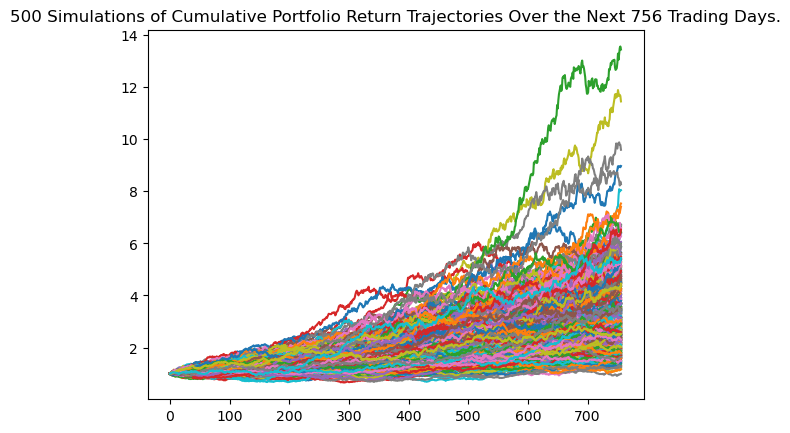

In [581]:
# Plot simulation outcomes
line_plot = MC_portfolio.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_portfolio_sim_plot.png", bbox_inches="tight")

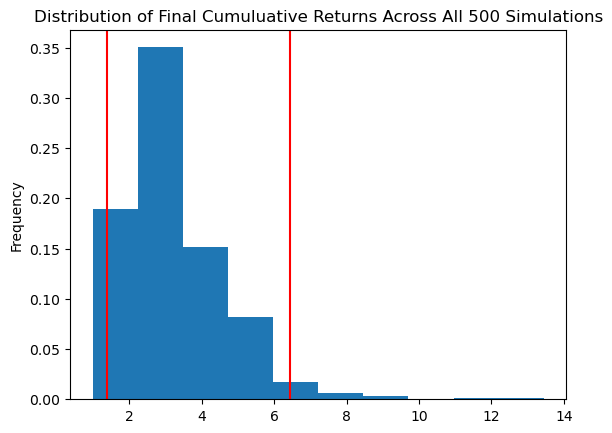

In [582]:
# Plot probability distribution and confidence intervals
dist_plot = MC_portfolio.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_portfolio_dist_plot.png',bbox_inches='tight')

In [583]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_portfolio.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count          500.00
mean             3.24
std              1.45
min              0.99
25%              2.29
50%              2.94
75%              3.84
max             13.44
95% CI Lower     1.39
95% CI Upper     6.44
Name: 756, dtype: float64


In [584]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in Coca-Cola and Microsoft stocks
ci_lower = round(tbl[8]*10000,2)
ci_upper = round(tbl[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 3 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 3 years will end within in the range of $13935.85 and $64399.54


In [ ]:
#use read csv import customer's current portfolio constituent stocks（Symbols_list，Weights of stocks）


#use read csv import customer's current protfolio data (Date, Daily net value，Additional investment，Withdrawal of investment)


In [185]:
import yfinance as yf
from MCForecastTools import MCSimulation

symbol = 'ARKK'
start_date = '2022-04-01'
end_date = '2023-03-31'
ticker_data = yf.download(symbol, start=start_date, end=end_date)

ticker_data = pd.concat([ticker_data], axis=1, keys=["ARKK"])

ticker_data = ticker_data.rename(columns={"Close":"close"})

ticker_data = ticker_data.drop(columns=["Open","High","Low"])

[*********************100%***********************]  1 of 1 completed


KeyError: 'Open'

In [ ]:
#use current protfolio as Benchmark:
##calculate portfolio's cumulative returns and net value.

initial_investment = 1000
cumulative_returns = (1 + portfolio_returns).cumprod() - 1 
net_values = (cumulative_returns  + 1) * initial_investment 
print(net_values)

def formatter(x):
    return f'{x:.0f}'

net_values.hvplot.line(
    xlabel='Time',
    ylabel='Net Value',
    yformatter=formatter,
    title='Portfolio Net Value Over Time',
    width=700,
    height=400
)
#calculate current portfolio's sharpe ratio

In [ ]:
#use python variable function "ask user to input STOCKs that want to add/delete from currunt portfolio"

#ask users how much moneny/weight they want to buy the stock in the portfolio

#ask users how much moneny/weight they want to sell the stock in the portfolio

#display the New Portfolio with symbols_list and weights

In [ ]:
#use historic data to backtest the New Portfolio.

#calculate new portfolio's daily returns, period returns, and annulized returns.

#calculate new portfolio's annual standard deviation.

#calculate new portfolio's sharpe ratio.

In [ ]:
#use MCS to forecast New Portfolio's expected return.

#use HVplot function to display performance of New Portfolio and Original Portfolio.